#Tarea 8.6

Valentina Martínez Garrido 20.925.164-7

Modifique los códigos de Runge-Kutta-Fehlberg y Adams con control de error para que impriman el número de pasos requeridos. Luego resuelva el siguiente problema de condición incial con ambos métodos y compare para diferentes tolerancias:

$$
y'(t) = (1/t)(y^2 + y)\,,\quad 1 \leq t \leq 3\,,\quad y(1) = -2\,.
$$

In [1]:
import numpy as np

In [10]:
def runge_kutta_fehlberg(f, y_0, t_0, t_f, tol):
    """
    Runge-Kutta-Fehlberg con control de error y conteo de pasos.
    f: función que representa la ecuación diferencial
    y_0: valor inicial de y
    t_0: valor inicial de t
    t_f: valor final de t
    tol: tolerancia deseada para el error.
    """
    h = 0.1  # Tamaño inicial de paso
    t, y = t_0, y_0
    steps = 0  # Contador de pasos
    result = [(t, y)]

    while t < t_f:
        # Coeficientes de Runge-Kutta-Fehlberg para control de error
        k1 = h * f(t, y)
        k2 = h * f(t + 1/4 * h, y + 1/4 * k1)
        k3 = h * f(t + 3/8 * h, y + 3/32 * k1 + 9/32 * k2)
        k4 = h * f(t + 12/13 * h, y + 1932/2197 * k1 - 7200/2197 * k2 + 7296/2197 * k3)
        k5 = h * f(t + h, y + 439/216 * k1 - 8 * k2 + 3680/513 * k3 - 845/4104 * k4)
        k6 = h * f(t + 1/2 * h, y - 8/27 * k1 + 2 * k2 - 3544/2565 * k3 + 1859/4104 * k4 - 11/40 * k5)

        # Calculo de y con Runge-Kutta de orden 4 y 5
        y_rk4 = y + 25/216 * k1 + 1408/2565 * k3 + 2197/4104 * k4 - 1/5 * k5
        y_rk5 = y + 16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6

        # Estimación del error
        error = abs(y_rk5 - y_rk4)

        # Verificar si el error es aceptable
        if error < tol:
            y = y_rk5
            t += h
            result.append((t, y))

        #Ajuste de tamaño del paso segun el error
        h = h * min(4, max(0.1, 0.84 * (tol / error)**0.25))
        steps += 1

    print(f"Runge-Kutta-Fehlberg completado con {steps} pasos")
    return result


In [14]:
#La ecuación diferencial como una función de lambda
f = lambda t, y: (1/t) * (y**2 + y)
#Condiciónes iniciales y parametros
y_0 = -2
t_0 = 1
t_f = 3
tol = 1e-6 #Tolerancia de ejemplo

#Ejecutar
resultado = runge_kutta_fehlberg(f, y_0, t_0, t_f, tol)
print(resultado)


Runge-Kutta-Fehlberg completado con 9 pasos
[(1, -2), (1.1, -1.8333339579231662), (1.1979869379831187, -1.716346412645672), (1.3291680709483418, -1.6030147827435959), (1.4923169197305786, -1.5038720828566772), (1.704276877450061, -1.415187806508103), (1.9835703084586267, -1.3370258094387601), (2.3619303819114608, -1.2685396414902868), (2.8916083893712012, -1.209065652568384), (3.669142416122149, -1.1577730179821237)]


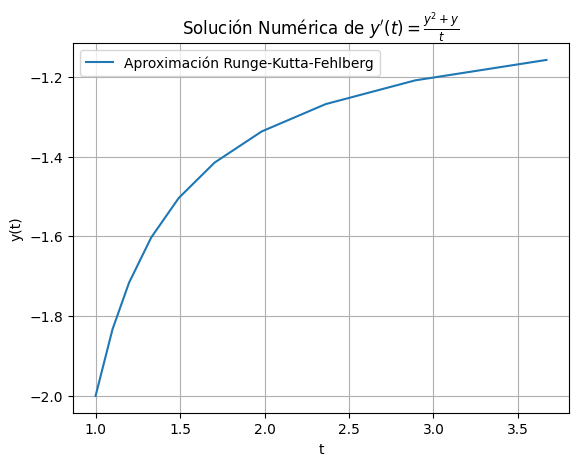

In [16]:
#Ejemplo en grafico
import matplotlib.pyplot as plt
#Separamos valores
t_values, y_values = zip(*resultado)
# Grafico
plt.plot(t_values, y_values, label='Aproximación Runge-Kutta-Fehlberg')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Numérica de $y\'(t) = \\frac{y^2 + y}{t}$')
plt.legend()
plt.grid(True)
plt.show()

